In [8]:
from cyclum import tuning

In [9]:
import numpy as np
import matplotlib.pyplot as plt

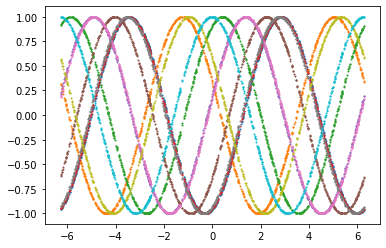

In [10]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [11]:
gene = np.hstack([gene0, gene1, gene01])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...
epoch: 100/200, loss:  0.3654, time elapsed:  12.05s, time left:  12.05s
epoch: 200/200, loss:  0.3621, time elapsed:  23.66s, time left:  0.00s
[0.3620666189193726]
[0.36250911933179547, 0.1728722977408964, 0.0014718779918086054]
    1 linear dimensions...
epoch: 100/200, loss:  0.1397, time elapsed:  13.58s, time left:  13.58s
epoch: 200/200, loss:  0.1390, time elapsed:  26.48s, time left:  0.00s
[0.3620666189193726, 0.1389677370786667]
[0.36250911933179547, 0.1728722977408964, 0.0014718779918086054]
    2 linear dimensions...
epoch: 100/200, loss:  0.0530, time elapsed:  13.41s, time left:  13.41s
epoch: 200/200, loss:  0.0528, time elapsed:  26.31s, time left:  0.00s
[0.3620666189193726, 0.1389677370786667, 0.05280916625261307]
[0.36250911933179547, 0.1728722977408964, 0.0014718779918086054]
Found! Use 1 linear components...
Early stop disabled, continue to check al

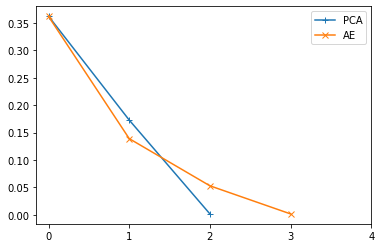

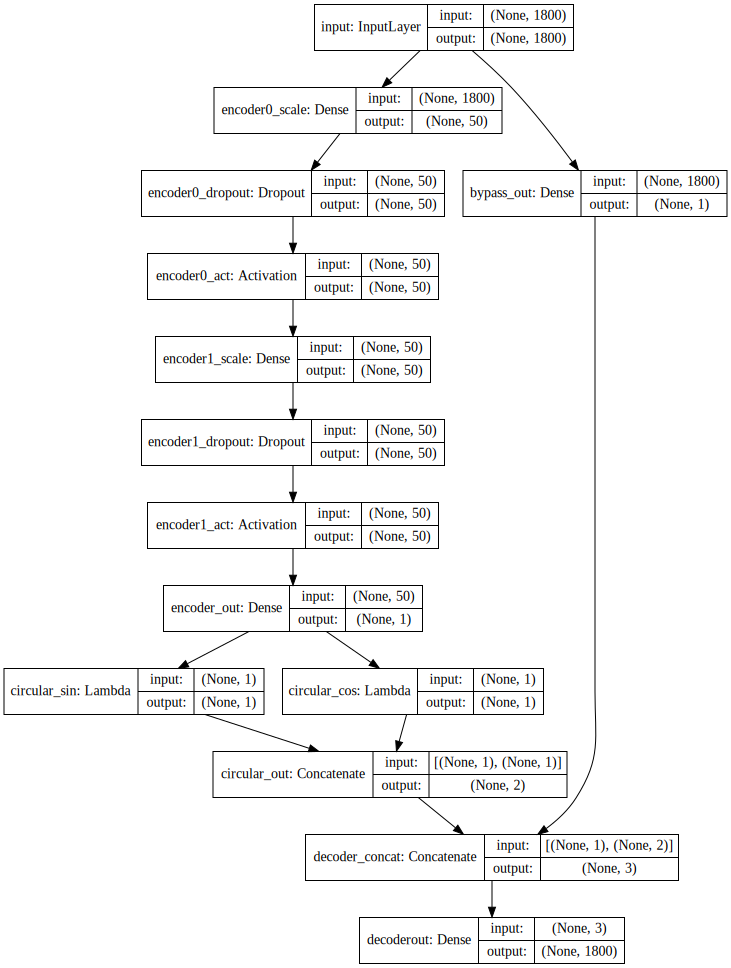

In [12]:
model = tuning.CyclumAutoTune(gene, epochs=200, early_stop=False)
model.show_elbow()
model.show_structure()

In [13]:
model.train(gene, epochs=1000, verbose=100)

epoch: 100/1000, loss:  0.2075, time elapsed:  12.82s, time left:  115.36s
epoch: 200/1000, loss:  0.1428, time elapsed:  25.15s, time left:  100.62s
epoch: 300/1000, loss:  0.1349, time elapsed:  37.35s, time left:  87.16s
epoch: 400/1000, loss:  0.1294, time elapsed:  49.57s, time left:  74.35s
epoch: 500/1000, loss:  0.1301, time elapsed:  61.65s, time left:  61.65s
epoch: 600/1000, loss:  0.1269, time elapsed:  73.54s, time left:  49.03s
epoch: 700/1000, loss:  0.1248, time elapsed:  85.53s, time left:  36.66s
epoch: 800/1000, loss:  0.1258, time elapsed:  97.72s, time left:  24.43s
epoch: 900/1000, loss:  0.1239, time elapsed:  109.89s, time left:  12.21s
epoch: 1000/1000, loss:  0.1238, time elapsed:  121.90s, time left:  0.00s


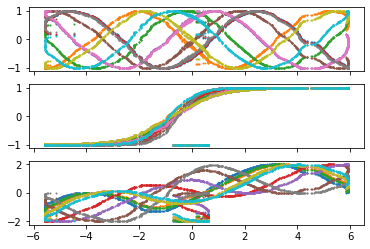

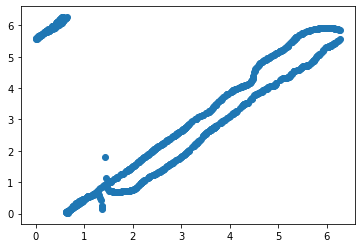

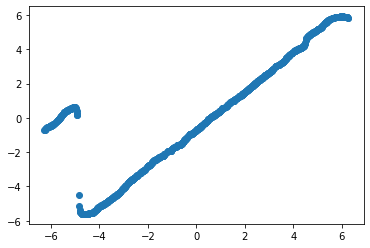

In [14]:
pseudotime = model.predict_pseudotime(gene)
fig, ax = plt.subplots(3, 1, sharex=True)
for i in range(10):
    ax[0].scatter(x=pseudotime[0], y=gene0[:, i], s=1)
for i in range(10):
    ax[1].scatter(x=pseudotime[0], y=gene1[:, i], s=1)
for i in range(10):
    ax[2].scatter(x=pseudotime[0], y=gene01[:, i], s=1)

plt.figure()
plt.scatter(cell_time % (2 * np.pi), pseudotime[0] % (2 * np.pi))

plt.figure()
plt.scatter(cell_time, pseudotime[0])